<a href="https://colab.research.google.com/github/naidu199/CodeWay-ML-/blob/main/credit_card_fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
raw_data=pd.read_csv("/content/drive/MyDrive/FML_DATA_SETS/credit card fraud Detection /PS_20174392719_1491204439457_log.csv")
raw_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [39]:
data=raw_data.iloc[:2620]

In [40]:
data.shape

(2620, 11)

In [41]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,2620.0,2.620000e+03,2.620000e+03,2.620000e+03,2.620000e+03,2.620000e+03,2620.000000,2620.0
mean,1.0,1.055404e+05,8.207836e+05,8.398497e+05,7.024779e+05,9.559343e+05,0.006107,0.0
std,0.0,2.468862e+05,1.936319e+06,1.980422e+06,2.143229e+06,2.860721e+06,0.077922,0.0
min,1.0,6.420000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,1.0,3.915938e+03,9.150250e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,1.0,9.910020e+03,2.211219e+04,1.386267e+04,0.000000e+00,0.000000e+00,0.000000,0.0
75%,1.0,1.146133e+05,2.011165e+05,2.015433e+05,3.560640e+05,2.650924e+05,0.000000,0.0
max,1.0,3.776389e+06,1.010284e+07,1.024625e+07,1.951612e+07,1.916920e+07,1.000000,0.0


In [42]:
data['isFraud'].value_counts()

0    2604
1      16
Name: isFraud, dtype: int64

In [43]:
data.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)


<ipython-input-43-2e4bed1068a4>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [45]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['type']=encoder.fit_transform(data['type'])

<ipython-input-45-2e9cdcdb6579>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [46]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1,0
3,1,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [47]:
data.isna().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [48]:
fig = px.scatter(data, x = 'amount', y =data.index, color = data.isFraud,
                title = 'Distribution of Amount Values')
fig.update_layout(xaxis_title='Transaction Amount (in €)',
                    yaxis_title='Transactions')
fig.show()

In [49]:
X = data.drop(columns=['isFraud'], axis=1)
Y = data.isFraud

In [50]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.27,random_state=41)

In [51]:
#handling data imbalance using smote
from imblearn.over_sampling import SMOTE
xtrain,ytrain = SMOTE().fit_resample(xtrain,ytrain)

In [52]:
ytrain.value_counts()

0    1900
1    1900
Name: isFraud, dtype: int64

In [53]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            3800 non-null   int64  
 1   type            3800 non-null   int64  
 2   amount          3800 non-null   float64
 3   oldbalanceOrg   3800 non-null   float64
 4   newbalanceOrig  3800 non-null   float64
 5   oldbalanceDest  3800 non-null   float64
 6   newbalanceDest  3800 non-null   float64
 7   isFlaggedFraud  3800 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 237.6 KB


In [54]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)

LogisticRegression()

In [61]:
ypred=lr.predict(xtest)


In [57]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
print("accuracy_score :", accuracy_score(ytest, ypred))
print("recall_score :", recall_score(ytest, ypred))
print("precision_score :", precision_score(ytest, ypred))


accuracy_score : 0.9081920903954802
recall_score : 1.0
precision_score : 0.057971014492753624


[[639  65]
 [  0   4]]


<Axes: >

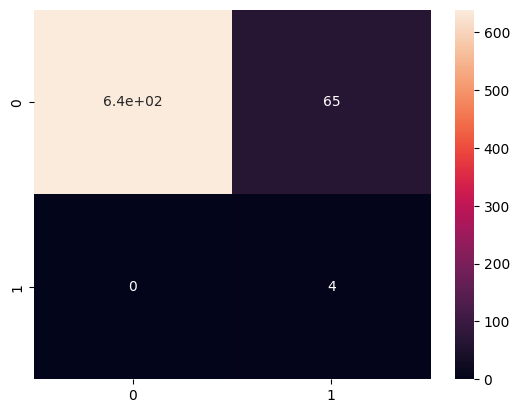

In [59]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest, ypred)
print(cm)
sns.heatmap(cm,annot=True)

In [64]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10).fit(xtrain, ytrain)


In [65]:
ypred1=rfc.predict(xtest)

accuracy_score : 0.9915254237288136
recall_score : 0.75
precision_score : 0.375
precision_score : [[699   5]
 [  1   3]]
[[699   5]
 [  1   3]]


<Axes: >

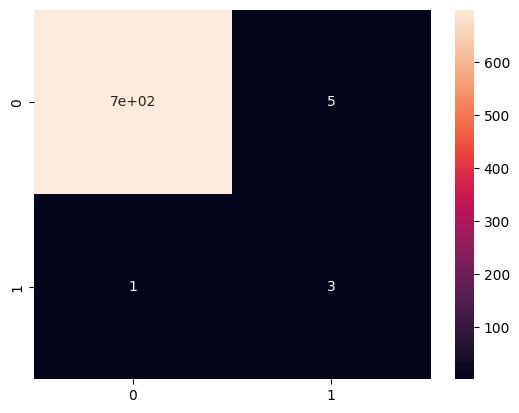

In [66]:
print("accuracy_score :", accuracy_score(ytest, ypred1))
print("recall_score :", recall_score(ytest, ypred1))
print("confusion_matrix :", precision_score(ytest, ypred1))
cm=confusion_matrix(ytest, ypred1)
print("precision_score :", cm)
sns.heatmap(cm,annot=True)